In [1]:
import matplotlib.pyplot as plt
from birdseye.results import * 


{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstate', 'target_speed': '1', 'lambda_arg': '0.8', 'collision': '-2.0', 'loss': '-2.0', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '2000'}, 'Defaults': {'lambda_arg': '0.8', 'collision': '-2.', 'loss': '-2.', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '500'}}
{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstate', 'target_speed': '3', 'lambda_arg': '0.8', 'collision': '-2.0', 'loss': '-2.0', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '2000'}, 'Defaults': {'lambda_arg': '0.8', 'collision': '-2.', 'loss': '-2.', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '500'}}
{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstat

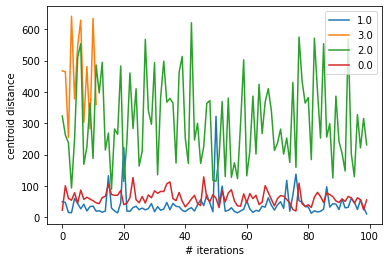

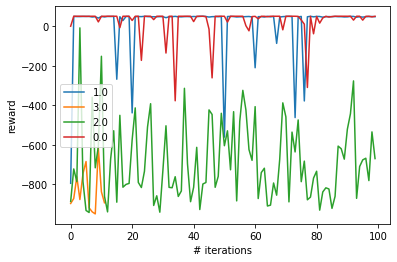

In [101]:

mcts_runs = get_valid_runs('mcts')
#config_filter = {'target_speed':'0.0'}
config_filter = {'datetime_start': '2021-05-03T22:26:56' }
config_filter = {'sensor': 'signalstrength'}
filtered_mcts_runs = filter_runs('mcts', mcts_runs, config_filter)

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    print(config)
    data = get_data('mcts', r)
    plt.plot( data['avg_centroid_err'], label=float(config['Methods']['target_speed']))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.show()

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    data = get_data('mcts', r)
    plt.plot(data['total_reward'], label=float(config['Methods']['target_speed']))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.show()

In [62]:
mcts_logs = {}
for run in filtered_mcts_runs: 
    mcts_logs[run] = {
        'config': get_config('mcts', run), 
        'data': get_data('mcts', run)
    }

In [64]:
mcts_logs.keys()

dict_keys(['2021-05-06T06:04:20', '2021-05-06T13:14:53', '2021-05-05T22:54:30'])

In [71]:
[1]*10*np.mean([1,2])

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

['2021-05-06T17:29:55', '2021-05-05T15:40:53', '2021-05-06T04:33:58']
100
100
100
100


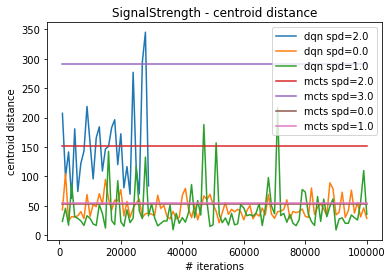

100
100
100
100


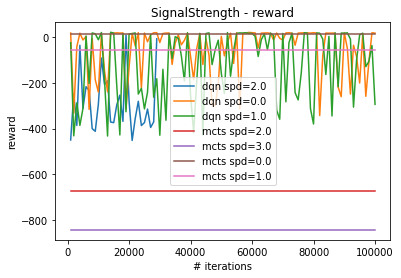

In [102]:
dqn_runs = get_valid_runs('dqn')
#config_filter = {'target_speed':'0.0'}
config_filter = {'datetime_start': '2021-05-03T22:26:56' }
config_filter = {'sensor': 'signalstrength'}
filtered_dqn_runs = filter_runs('dqn', dqn_runs, config_filter)
print(filtered_dqn_runs)

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['avg_centroid_err'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))

for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['avg_centroid_err'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.title('SignalStrength - centroid distance')
plt.show()

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['total_reward'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))
    
for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['total_reward'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.title('SignalStrength - reward')
plt.show()
#total_reward

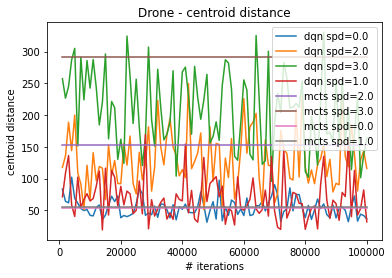

100
100
100
100


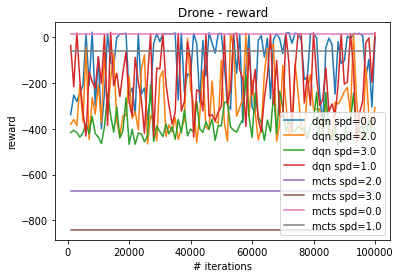

In [100]:

dqn_config_filter = {'sensor': 'drone', 'datetime_start': '2021-05-05T13:38:11', 'target_speed_range':None}
mcts_config_filter = {'sensor': 'drone', 'datetime_start': '2021-05-03T22:26:56', 'target_speed_range':None}


filtered_mcts_runs = filter_runs('mcts', mcts_runs, mcts_config_filter)
filtered_dqn_runs = filter_runs('dqn', dqn_runs, dqn_config_filter)

mcts_logs = {}
for run in filtered_mcts_runs: 
    mcts_logs[run] = {
        'config': get_config('mcts', run), 
        'data': get_data('mcts', run)
    }
dqn_logs = {}
for run in filtered_dqn_runs: 
    dqn_logs[run] = {
        'config': get_config('dqn', run), 
        'data': get_data('dqn', run)
    }
n_iter = None
plt.figure()
for run in dqn_logs: 
    if n_iter is None: 
        n_iter = dqn_logs[run]['data']['n_iter']
    plt.plot(dqn_logs[run]['data']['n_iter'], dqn_logs[run]['data']['avg_centroid_err'], label='dqn spd={}'.format(float(dqn_logs[run]['config']['Methods']['target_speed'])))

for run in mcts_logs: 
    plt.plot(n_iter, len(n_iter)*[np.mean(mcts_logs[run]['data']['avg_centroid_err'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.title('Drone - centroid distance')
plt.show()

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['total_reward'], label='dqn spd={}'.format(float(config['Methods']['target_speed'])))
    
for run in mcts_logs: 
    print(len(data['n_iter']))
    plt.plot(data['n_iter'], len(data['n_iter'])*[np.mean(mcts_logs[run]['data']['total_reward'])], label='mcts spd={}'.format(float(mcts_logs[run]['config']['Methods']['target_speed'])))
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.title('Drone - reward')
plt.show()
#total_reward

In [99]:
dqn_logs.keys()

dict_keys(['2021-05-05T14:30:21'])

In [95]:
mcts_logs.keys()

dict_keys(['2021-05-03T22:26:56'])

{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstate', 'target_speed': '1', 'lambda_arg': '0.8', 'collision': '-2.0', 'loss': '-2.0', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '2000'}, 'Defaults': {'lambda_arg': '0.8', 'collision': '-2.', 'loss': '-2.', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '500'}}
{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstate', 'target_speed': '2', 'lambda_arg': '0.8', 'collision': '-2.0', 'loss': '-2.0', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '2000'}, 'Defaults': {'lambda_arg': '0.8', 'collision': '-2.', 'loss': '-2.', 'depth': '10', 'simulations': '500', 'plotting': 'False', 'trials': '100', 'iterations': '500'}}
{'Methods': {'method': 'mcts', 'action': 'simpleactions', 'sensor': 'signalstrength', 'state': 'rfstat

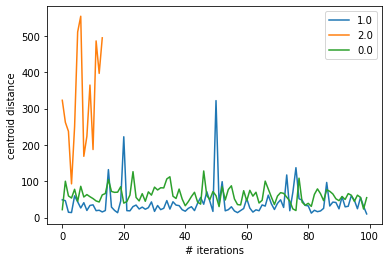

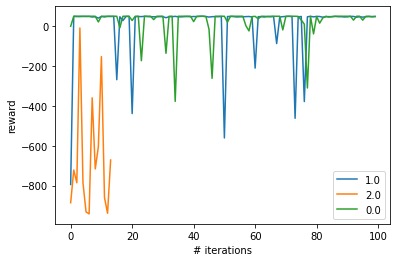

In [4]:
import pprint
pprinter = pprint.PrettyPrinter(indent=4)
for r in filtered_mcts_runs: 
    print(r)
    pprinter.pprint(get_config('mcts',r))

2021-05-04T03:50:08
{   'Defaults': {   'collision': '-2.',
                    'depth': '10',
                    'iterations': '500',
                    'lambda_arg': '0.8',
                    'loss': '-2.',
                    'plotting': 'False',
                    'simulations': '500',
                    'trials': '100'},
    'Methods': {   'action': 'simpleactions',
                   'collision': '-2.0',
                   'depth': '10',
                   'iterations': '2000',
                   'lambda_arg': '0.8',
                   'loss': '-2.0',
                   'method': 'mcts',
                   'plotting': 'False',
                   'sensor': 'drone',
                   'simulations': '500',
                   'state': 'rfstate',
                   'target_speed': '2',
                   'trials': '100'}}
2021-05-04T06:32:09
{   'Defaults': {   'collision': '-2.',
                    'depth': '10',
                    'iterations': '500',
                    'la

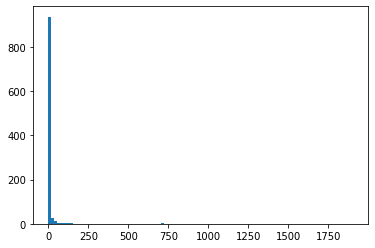

In [20]:
import numpy as np 
x = []
for i in range(1000): 
    x.append(np.random.pareto(1))
plt.figure()
plt.hist(x, bins=100)
plt.show()

In [28]:
a = np.random.rand(2,100)
H,_,_ = np.histogram2d(a[0,:], a[1,:])

In [29]:
H

array([[0., 1., 2., 1., 1., 0., 5., 1., 0., 2.],
       [1., 3., 0., 0., 0., 1., 0., 0., 3., 0.],
       [0., 1., 0., 2., 1., 1., 1., 3., 0., 1.],
       [1., 2., 1., 0., 2., 2., 2., 3., 1., 1.],
       [0., 0., 2., 0., 0., 1., 0., 0., 1., 2.],
       [0., 4., 1., 3., 1., 0., 1., 0., 3., 0.],
       [3., 0., 1., 0., 0., 1., 0., 1., 1., 3.],
       [2., 0., 3., 2., 0., 1., 2., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 3., 1., 0., 1., 0., 1.]])

In [30]:
np.sum(H)

100.0

In [49]:
b = H/np.sum(H)

b += 0.0000001

In [50]:
ent = - np.sum(b*np.log(b))
print(ent)

3.97339012811242


In [33]:
b

array([[0.  , 0.01, 0.02, 0.01, 0.01, 0.  , 0.05, 0.01, 0.  , 0.02],
       [0.01, 0.03, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.03, 0.  ],
       [0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.03, 0.  , 0.01],
       [0.01, 0.02, 0.01, 0.  , 0.02, 0.02, 0.02, 0.03, 0.01, 0.01],
       [0.  , 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.02],
       [0.  , 0.04, 0.01, 0.03, 0.01, 0.  , 0.01, 0.  , 0.03, 0.  ],
       [0.03, 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.03],
       [0.02, 0.  , 0.03, 0.02, 0.  , 0.01, 0.02, 0.01, 0.01, 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.03, 0.01, 0.  , 0.01, 0.  , 0.01]])

In [34]:
0.0001 * np.log(0.0001)

-0.0009210340371976182

In [56]:
x = [0.2, 0.2, 0.2, 0.2, 0.2]
#x = [0.1, 0.7, 0.1, 0.09, 0.01]
y = x * np.log(x)
print(-1.*np.sum(y))

1.6094379124341005


In [59]:
def ttt(a): 
    print(a)
ttt(a='b')

b
